In [ ]:
import pandas as pd
import numpy as np
import random,os
import torch.utils.data as Data
from sklearn.metrics import f1_score,recall_score,precision_score,roc_curve,auc,accuracy_score,confusion_matrix,r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import torch
# import torch.nn as nn
from torch import nn,optim
import torch.nn.functional as F
from torch.optim.optimizer import Optimizer, required
import gc
import time
import math
import matplotlib.pyplot as plt

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BasicBlock1D(nn.Module):
    expansion = 1
    def __init__(self, in_planes, planes, stride=1, downsample=None):
        super(BasicBlock1D, self).__init__()
        self.conv1 = nn.Conv1d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm1d(planes)
        self.conv2 = nn.Conv1d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm1d(planes)
        self.downsample = downsample
        self.stride = stride
    def forward(self, x):
        identity = x
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        if self.downsample is not None:
            identity = self.downsample(x)
        out += identity
        out = F.relu(out)
        return out
class ResNet1D(nn.Module):
    def __init__(self, p,block, layers):
        super(ResNet1D, self).__init__()
        self.in_planes = 2
        self.conv1 = nn.Conv1d(1, 2, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(2)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 4, layers[0])
        self.layer2 = self._make_layer(block, 6, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 8, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 16, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(16 * block.expansion, 5)
        self.fc2 = nn.Linear(128, 5)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_planes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.in_planes, planes * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.in_planes, planes, stride, downsample))
        self.in_planes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_planes, planes))
        return nn.Sequential(*layers)
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.maxpool(x)
        # print(x.shape)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        # print(x.shape)
        x = self.layer4(x)
        # print(x.shape)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        # print(x.shape)
        x = self.fc1(x)

        # x = self.relu(x)
        # x = self.dropout(x)
        # x = self.fc2(x)
        return x


p = 0.01
# Example usage:
model = ResNet1D(p,BasicBlock1D, [2, 2, 2, 2])
input_data = torch.randn(32, 1, 30987)  # 32是batch size
output = model(input_data)
print(output.shape)


torch.Size([32, 5])


In [ ]:
os.getcwd()

'/root/1/resnet_1d'

In [ ]:
path1='/root/1/resnet_1d/'
path_name = os.path.join(path1,'pig_data.csv')
df = pd.read_csv(path_name,header=None)
df

/tmp/ipykernel_870/725109663.py:3: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path_name,header=None)


,0,1,2,3,4,5,6,7,8,9,...,52839,52840,52841,52842,52843,52844,52845,52846,52847,52848
0,ID,t1,t2,t3,t4,t5,1.0,2.0,3.0,4.0,...,52834.0,52835.0,52836.0,52837.0,52838.0,52839.0,52840.0,52841.0,52842.0,52843.0
1,1136,-0.8687035,0.28158495,1.71659645,-0.8861064,47.6114438,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,1.0
2,1318,0.13144417,-1.7468354,0.95272593,0.15843581,-41.940212,1.0,2.0,1.0,0.0,...,0.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
3,1319,-0.8536013,-2.9968045,-0.0871332,-1.2177578,100.653792,1.0,2.0,1.0,1.0,...,0.0,1.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,2.0
4,1321,0.03416785,-0.320321,-0.071189,-1.4672803,13.8808255,1.0,2.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,6466,0.045294,1.386794,2.291255,0.226449,-23.831346,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0
2311,6467,-1.199029,-0.565144,2.225259,-5.672833,85.793067,1.0,2.0,1.0,2.0,...,1.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0
2312,6469,-0.964449,0.673534,1.754374,-1.489569,-8.871632,2.0,2.0,2.0,1.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0
2313,6471,-0.832078,-1.40681,2.368887,-1.517962,51.492272,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0


In [ ]:
df.columns = df.iloc[0,:]
df = df.iloc[1:,:]
df.index = range(len(df))
df

,ID,t1,t2,t3,t4,t5,1.0,2.0,3.0,4.0,...,52834.0,52835.0,52836.0,52837.0,52838.0,52839.0,52840.0,52841.0,52842.0,52843.0
0,1136,-0.8687035,0.28158495,1.71659645,-0.8861064,47.6114438,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,1.0
1,1318,0.13144417,-1.7468354,0.95272593,0.15843581,-41.940212,1.0,2.0,1.0,0.0,...,0.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,1319,-0.8536013,-2.9968045,-0.0871332,-1.2177578,100.653792,1.0,2.0,1.0,1.0,...,0.0,1.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,2.0
3,1321,0.03416785,-0.320321,-0.071189,-1.4672803,13.8808255,1.0,2.0,0.0,0.0,...,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0
4,1322,0.57391141,-2.0458374,0.054743,0.16402708,-58.738674,2.0,2.0,1.0,1.0,...,0.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,6466,0.045294,1.386794,2.291255,0.226449,-23.831346,0.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0
2310,6467,-1.199029,-0.565144,2.225259,-5.672833,85.793067,1.0,2.0,1.0,2.0,...,1.0,1.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0,2.0
2311,6469,-0.964449,0.673534,1.754374,-1.489569,-8.871632,2.0,2.0,2.0,1.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0
2312,6471,-0.832078,-1.40681,2.368887,-1.517962,51.492272,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0


In [ ]:
X = df.iloc[:,6:]
Y = df.iloc[:,1:6]
Y

,t1,t2,t3,t4,t5
0,-0.8687035,0.28158495,1.71659645,-0.8861064,47.6114438
1,0.13144417,-1.7468354,0.95272593,0.15843581,-41.940212
2,-0.8536013,-2.9968045,-0.0871332,-1.2177578,100.653792
3,0.03416785,-0.320321,-0.071189,-1.4672803,13.8808255
4,0.57391141,-2.0458374,0.054743,0.16402708,-58.738674
...,...,...,...,...,...
2309,0.045294,1.386794,2.291255,0.226449,-23.831346
2310,-1.199029,-0.565144,2.225259,-5.672833,85.793067
2311,-0.964449,0.673534,1.754374,-1.489569,-8.871632
2312,-0.832078,-1.40681,2.368887,-1.517962,51.492272


In [ ]:
Y = Y.astype('float')

In [ ]:
from sklearn.preprocessing import OneHotEncoder


# 初始化OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# 选择要进行独热编码的列
cols_to_encode = df.columns[6:]

# 拟合训练集
encoder.fit(X)

# 对训练集和测试集进行转换
X_encoded = encoder.transform(X)


/root/miniconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_encoded.shape

(2314, 279995)

In [ ]:
X_encoded = X_encoded.reshape(len(X_encoded),1,-1)

In [ ]:

# # 假设data是一个形状为(N, 30987)的数组
# padding = np.zeros((X_encoded.shape[0], 31329 - X_encoded.shape[1]))
# data_padded = np.concatenate([X_encoded, padding], axis=1)
# # 然后，将数据重塑为(n, 177, 177, 1)
# data_reshaped = data_padded.reshape(-1, 1,177, 177)
# data_reshaped.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded,Y , test_size=0.2, random_state=42)

In [ ]:
def z_score(data):
    data = data.astype(float)
    Mean = data.mean()
    Var = ((data - Mean)**2).mean()
    Std = pow(Var,0.5)
    data = (data - Mean)/Std  # 标准化
    return Mean,Std,data
Mean,Std,Y_train = z_score(Y_train)
Y_test = (Y_test - Mean)/Std

In [ ]:
Y_train = Y_train.values
Y_test = Y_test.values

In [ ]:
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)

X_train = torch.tensor(X_train,dtype = torch.float)
Y_train  = torch.tensor(Y_train,dtype = torch.float)

X_test = torch.tensor(X_test,dtype = torch.float)
Y_test  = torch.tensor(Y_test,dtype = torch.float)
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

torch.Size([1851, 1, 279995]) torch.Size([1851, 5]) torch.Size([463, 1, 279995]) torch.Size([463, 5])


In [ ]:
train_loader = Data.DataLoader(
    dataset=Data.TensorDataset(X_train, Y_train),  # 封装进Data.TensorDataset()类的数据，可以为任意维度
    batch_size=35,  # 每块的大小
    shuffle=True,
    drop_last =True, #丢弃最后一组数据
    num_workers=0,  # 多进程（multiprocess）来读数据
)
test_loader = Data.DataLoader(
    dataset=Data.TensorDataset(X_test, Y_test),  # 封装进Data.TensorDataset()类的数据，可以为任意维度
    batch_size=35,  # 每块的大小
    shuffle=False,
    drop_last =True,
    num_workers=0,
)

In [ ]:
class AdamL2(Optimizer):
    r""" Implements Adam with L2 regularization using a proximal operator

    Arguments:
        params (iterable): Iterable of parameters to optimize or dicts defining parameter groups.
        lr (float, optional): Learning rate (default: 1e-3).
        betas (Tuple[float, float], optional): Coefficients used for computing running averages of gradient and its square (default: (0.9, 0.999)).
        eps (float, optional): Term added to the denominator to improve numerical stability (default: 1e-8).
        weight_decay (float, optional): Weight decay (L2 penalty) (default: 0).
        amsgrad (bool, optional): Whether to use the AMSGrad variant of this algorithm (default: False).
        penalty (float, optional): The penalty parameter for L2 regularization (default: 0).
    """
    def __init__(self, params, lr=1e-3, betas=(0.1, 0.999), eps=1e-8,
                 weight_decay=0, amsgrad=False, penalty=0.0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay,
                        amsgrad=amsgrad, penalty=penalty)
        super(AdamL2, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamL2, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)

    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError("Adam does not support sparse gradients, please consider SparseAdam instead")
                amsgrad = group['amsgrad']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                    if amsgrad:
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsgrad:
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                step_size = group['lr'] / bias_correction1

                # Perform parameter update
                p.data.addcdiv_(-step_size, exp_avg, denom)

                # Apply proximal L2 regularization
                if group['penalty'] > 0:
                    norm = p.data.norm(2)
                    if norm > 0:
                        shrinkage_factor = max(0, 1 - group['penalty'] * group['lr'] / norm)
                        p.data.mul_(shrinkage_factor)

        return loss

class AdamL12(Optimizer):
    r""" Implements Adam with L0 regularization

    A General Family of Proximal Methods for Stochastic Preconditioned Gradient Descent

    This family contains the Adam-type curvature estimate and
    L0 (non-convex, non-smooth) regularizer

    For this optimizer, the update rule is somewhat adaptive hard-thresholding
    """
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=1e-2, amsgrad=False, penalty=0.0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad,
                        penalty=penalty)
        super(AdamL12, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamL12, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault("amsgrad", False)

    def step(self, closure=None):
        """ Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                # Perform weight-decay
                p.data.mul_(1 - group['lr'] * group['weight_decay'])

                # Perform optimization step
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError("Adam does not support sparse gradients, please consider SparseAdam instead")
                amsgrad = group['amsgrad']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                    if amsgrad:
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsgrad:
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                step_size = group['lr'] / bias_correction1

                p.data.addcdiv_(-step_size, exp_avg, denom)

                if len(p.data.shape) == 2 or len(p.data.shape) == 4:
                    threshold = (54 ** (1/3) / 4) * ((2 * group['penalty'] * group['lr'] / denom) ** (2/3))
                    mask = p.data.abs() > threshold
                    mask = mask.float()

                    zero_mask = p.data.abs() <= threshold
                    zero_mask = zero_mask.float() + 1e-4

                    p.data.mul_(mask)
                    factor = (group['lr'] * group['penalty'] / denom) / 4
                    angle = factor * (((p.data.abs() + zero_mask) / 3) ** (-1.5))
                    angle = angle * mask
                    angle = torch.acos(angle)

                    value = p.data * (2/3) * (1 + torch.cos(2/3 * (math.pi - angle)))
                    p.data = value * mask

        return loss

class AdamL23(Optimizer):
    r""" Implements Adam with L0 regularization

    A General Family of Proximal Methods for Stochastic Preconditioned Gradient Descent

    This family contains the Adam-type curvature estimate and
    L0 (non-convex, non-smooth) regularizer

    For this optimizer, the update rule is somewhat adaptive hard-thresholding
    """
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=1e-2, amsgrad=False, penalty=0.0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad,
                        penalty=penalty)
        super(AdamL23, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamL23, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault("amsgrad", False)

    def step(self, closure=None):
        """ Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue

                # Perform weight-decay
                p.data.mul_(1 - group['lr'] * group['weight_decay'])

                # Perform optimization step
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError("Adam does not support sparse gradients, please consider SparseAdam instead")
                amsgrad = group['amsgrad']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                    if amsgrad:
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data, memory_format=torch.preserve_format)
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsgrad:
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    denom = (max_exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])
                else:
                    denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(group['eps'])

                step_size = group['lr'] / bias_correction1

                p.data.addcdiv_(-step_size, exp_avg, denom)

                if len(p.data.shape) == 2 or len(p.data.shape) == 4:
                    eff_lam = 2 * group['lr'] * group['penalty'] / denom
                    threshold = (2/3) * (3 * eff_lam ** 3) ** (1/4)
                    mask = p.data.abs() > threshold
                    mask = mask.float()

                    zero_mask = p.data.abs() <= threshold
                    zero_mask = zero_mask.float() * 100

                    p.data.mul_(mask)
                    angle = acosh((27/16) * (p.data ** 2 + zero_mask) * (eff_lam ** (-1.5)))
                    angle = angle * mask
                    absA = (2/math.sqrt(3)) * (eff_lam ** (1/4)) * (torch.cosh(angle/3) ** (1/2))

                    value = ((absA + torch.sqrt(2 * (p.data.abs() + zero_mask) / absA - absA ** 2)) / 2) ** 3

                    p.data = p.data.sign() * value * mask

        return loss

In [ ]:
import hyperopt
from hyperopt import hp, fmin, tpe, Trials, partial
from hyperopt.early_stop import no_progress_loss
def seed_torch():
    seed=1029
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
def hyperopt_objective(params):
    Epochs                = 100      # 训练轮数
    l           =params['lr']                     # 步长
    p           =params['p']
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    seed_torch()
    model = ResNet1D(p,BasicBlock1D, [2, 2, 2, 2])
    model = model.to(device)
    # 提取第一层参数
    first_layer_params = []
    other_params = []

    for name, param in model.named_parameters():
        if 'conv1' in name or 'bn1' in name:
            first_layer_params.append(param)
        else:
            other_params.append(param)

    # 定义两个优化器
    optimizer_first_layer = AdamL12(first_layer_params, lr=l)
    optimizer_other_layers = optim.Adam(other_params, lr=l)




    loss_function = nn.MSELoss()  # loss
    # optimizer = AdamL12(model.parameters(), lr=l)  # 优化器
    # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=9, gamma=0.95)
    LOSS = float('inf')
    result = {}
    result['train-loss']= []
    result['test-loss']= []
    start_time1 = time.time()
    for epochs in range(Epochs):
        start_time = time.time()
        model.train()
        train_loss = 0
        test_loss  = 0
        for data_l in train_loader:
            seq, labels = data_l
            seq, labels = seq.to(device), labels.to(device)
            optimizer_first_layer.zero_grad()                          #    清空过往梯度
            optimizer_other_layers.zero_grad()
            y_pred = model(seq)
            single_loss = loss_function(y_pred, labels)    #    获取loss：输入预测值和标签，计算损失函数
            single_loss.backward()                         #    反向传播，计算当前梯度
            # optimizer.step()                               #    根据梯度更新网络参数
            optimizer_first_layer.step()
            optimizer_other_layers.step()
            train_loss += single_loss.item()
        train_loss = train_loss/len(train_loader)
        # scheduler.step()
        model.eval()
        for data_l in test_loader:
            seq, labels = data_l
            seq, labels = seq.to(device), labels.to(device)
            y_pred = model(seq)
            single_loss = loss_function(y_pred, labels)    #    获取loss：输入预测值和标签，计算损失函数
            test_loss += single_loss.item()
        test_loss = test_loss/len(test_loader)
        if LOSS > test_loss:
            LOSS =test_loss
            # torch.save(model, 'model_cnn_pig_data.pth')
            # print('已更新保存模型')
        # result['train-loss'].append(train_loss)
        # result['test-loss'].append(test_loss)
        del seq, labels ,y_pred #删除数据与变量
        gc.collect() #清除数据与变量相关的缓存
        torch.cuda.empty_cache() #缓存分配器分配出去的内存给释放掉
        epoch_time = time.time() - start_time
    #     print('Epochs',epochs,'loss_train',train_loss,'loss_test',test_loss,'每轮耗时：',epoch_time)
    # all_time = time.time() - start_time1
    # print('总耗时:',all_time)
    return LOSS

param_grid_simple = {'lr': hp.uniform("lr",0.00005,0.1)
                     ,'p':hp.uniform('p',0.01,0.95)
                    }
def param_hyperopt(max_evals=100):

    #保存迭代过程
    trials = Trials()

    #设置提前停止
    early_stop_fn = no_progress_loss(100)

    #定义代理模型
    #algo = partial(tpe.suggest, n_startup_jobs=20, n_EI_candidates=50)
    params_best = fmin(hyperopt_objective #目标函数
                       , space = param_grid_simple #参数空间
                       , algo = tpe.suggest #代理模型你要哪个呢？
                       #, algo = algo
                       , max_evals = max_evals #允许的迭代次数
                       , verbose=True
                       , trials = trials
                       , early_stop_fn = early_stop_fn
                      )

    #打印最优参数，fmin会自动打印最佳分数
    print("\n","\n","best params: ", params_best,
          "\n")
    return params_best, trials
params =  param_hyperopt(max_evals=100)[0]
params

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/tmp/ipykernel_870/1815375738.py:77: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:1485.)
  exp_avg.mul_(beta1).add_(1 - beta1, grad)



 37%|███▋      | 37/100 [2:45:40<4:39:19, 266.03s/trial, best loss: 1.0143726330537062]

In [ ]:
l = params['lr']
p = params['p']

In [ ]:
Epochs                = 100      # 训练轮数

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def seed_torch():
    seed=1029
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed) # 为了禁止hash随机化，使得实验可复现
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
seed_torch()
model = ResNet1D(p,BasicBlock1D, [2, 2, 2, 2])
model = model.to(device)
# 提取第一层参数
first_layer_params = []
other_params = []

for name, param in model.named_parameters():
    if 'conv1' in name or 'bn1' in name:
        first_layer_params.append(param)
    else:
        other_params.append(param)

# 定义两个优化器
optimizer_first_layer = AdamL12(first_layer_params, lr=l)
optimizer_other_layers = optim.Adam(other_params, lr=l)




loss_function = nn.MSELoss()  # loss
# optimizer = AdamL12(model.parameters(), lr=l)  # 优化器
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=9, gamma=0.95)
LOSS = float('inf')
result = {}
result['train-loss']= []
result['test-loss']= []
start_time1 = time.time()
for epochs in range(Epochs):
    start_time = time.time()
    model.train()
    train_loss = 0
    test_loss  = 0
    for data_l in train_loader:
        seq, labels = data_l
        seq, labels = seq.to(device), labels.to(device)
        optimizer_first_layer.zero_grad()                          #    清空过往梯度
        optimizer_other_layers.zero_grad()
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)    #    获取loss：输入预测值和标签，计算损失函数
        single_loss.backward()                         #    反向传播，计算当前梯度
        # optimizer.step()                               #    根据梯度更新网络参数
        optimizer_first_layer.step()
        optimizer_other_layers.step()
        train_loss += single_loss.item()
    train_loss = train_loss/len(train_loader)
    # scheduler.step()
    model.eval()
    for data_l in test_loader:
        seq, labels = data_l
        seq, labels = seq.to(device), labels.to(device)
        y_pred = model(seq)
        single_loss = loss_function(y_pred, labels)    #    获取loss：输入预测值和标签，计算损失函数
        test_loss += single_loss.item()
    test_loss = test_loss/len(test_loader)
    if LOSS > test_loss:
        LOSS =test_loss
        torch.save(model, 'model_cnn_pig_data.pth')
        print('已更新保存模型')
    result['train-loss'].append(train_loss)
    result['test-loss'].append(test_loss)
    del seq, labels ,y_pred #删除数据与变量
    gc.collect() #清除数据与变量相关的缓存
    torch.cuda.empty_cache() #缓存分配器分配出去的内存给释放掉
    epoch_time = time.time() - start_time
    print('Epochs',epochs,'loss_train',train_loss,'loss_test',test_loss,'每轮耗时：',epoch_time)
all_time = time.time() - start_time1
print('总耗时:',all_time)

已更新保存模型
Epochs 0 loss_train 1.010607665547958 loss_test 1.0780249008765588 每轮耗时： 2.9164834022521973
Epochs 1 loss_train 0.9950360724559197 loss_test 1.1029571111385639 每轮耗时： 2.7396838665008545
Epochs 2 loss_train 0.9914432660891459 loss_test 1.1473208849246685 每轮耗时： 2.6563923358917236
已更新保存模型
Epochs 3 loss_train 0.9879113091872289 loss_test 1.0408187371033888 每轮耗时： 2.6594347953796387
Epochs 4 loss_train 0.9942276936310989 loss_test 1.0671539077391992 每轮耗时： 2.6840760707855225
Epochs 5 loss_train 0.9772659104603988 loss_test 1.098690940783574 每轮耗时： 2.6518712043762207
Epochs 6 loss_train 0.9774538381741598 loss_test 1.0605455728677602 每轮耗时： 2.741250514984131
Epochs 7 loss_train 0.9646104780527262 loss_test 1.0431903004646301 每轮耗时： 2.7423007488250732
Epochs 8 loss_train 0.9737558708741114 loss_test 1.3333098613298857 每轮耗时： 2.728891134262085
已更新保存模型
Epochs 9 loss_train 0.9739785366333448 loss_test 1.026265786244319 每轮耗时： 2.6693897247314453
已更新保存模型
Epochs 10 loss_train 0.962936771603731 loss

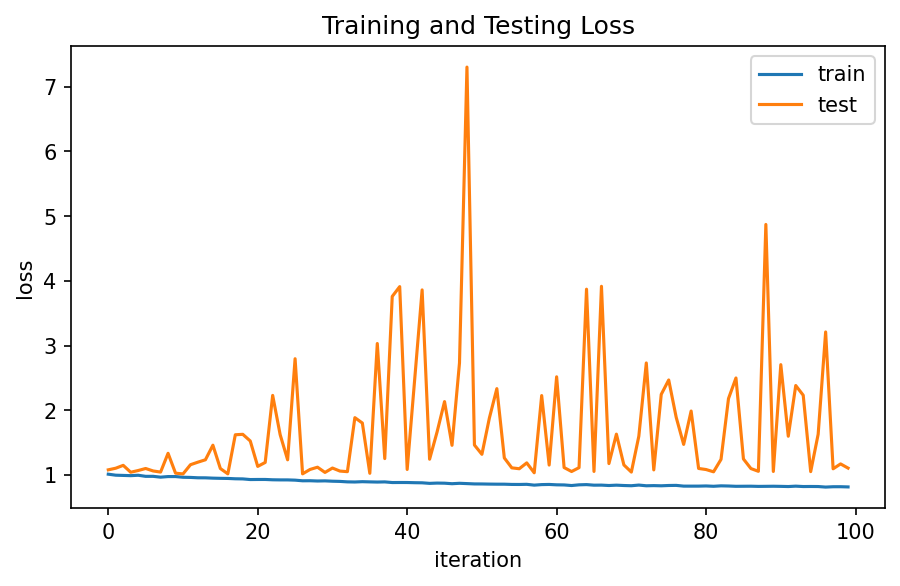

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=150,figsize=(7,4))
plt.plot(result['train-loss'][:], label='train')
plt.plot(result['test-loss'][:], label='test')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.savefig('resnet18loss1.jpg',dpi=150)
plt.show()

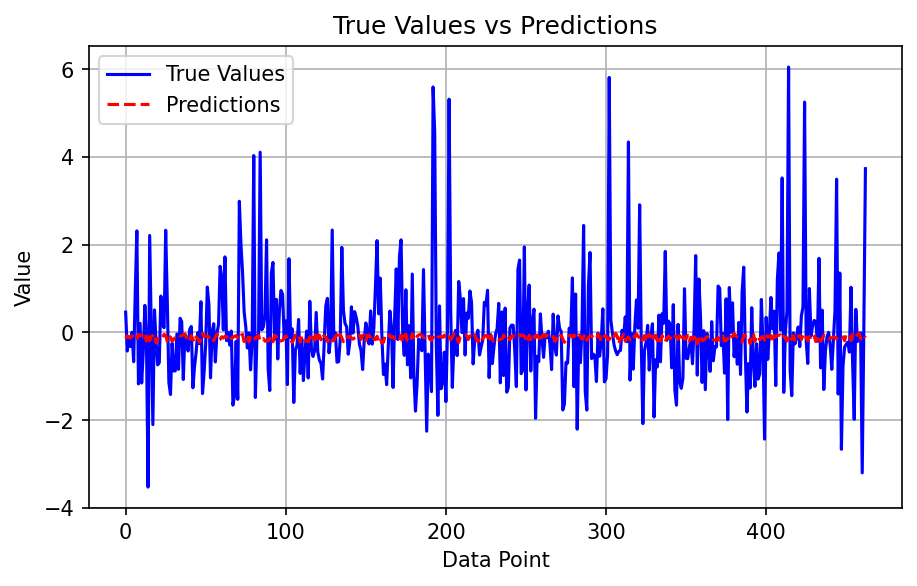

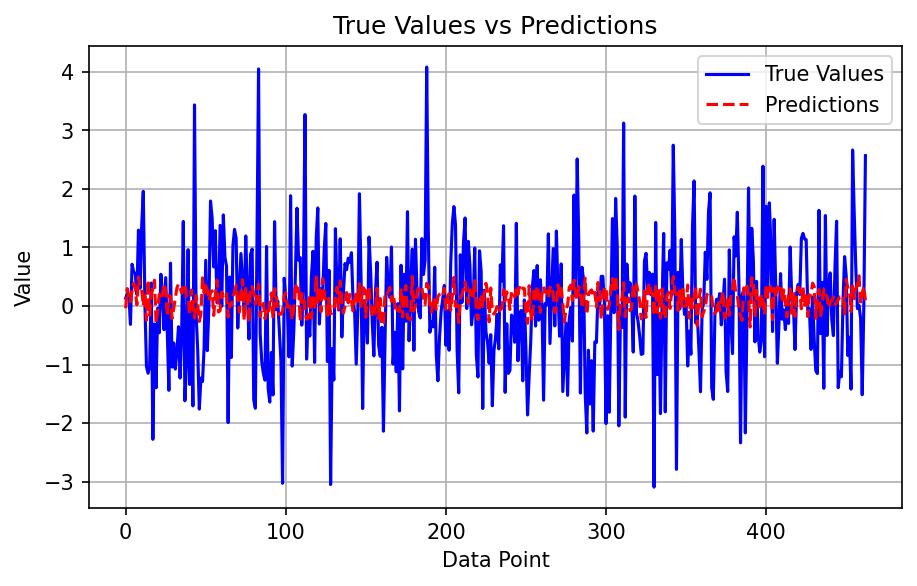

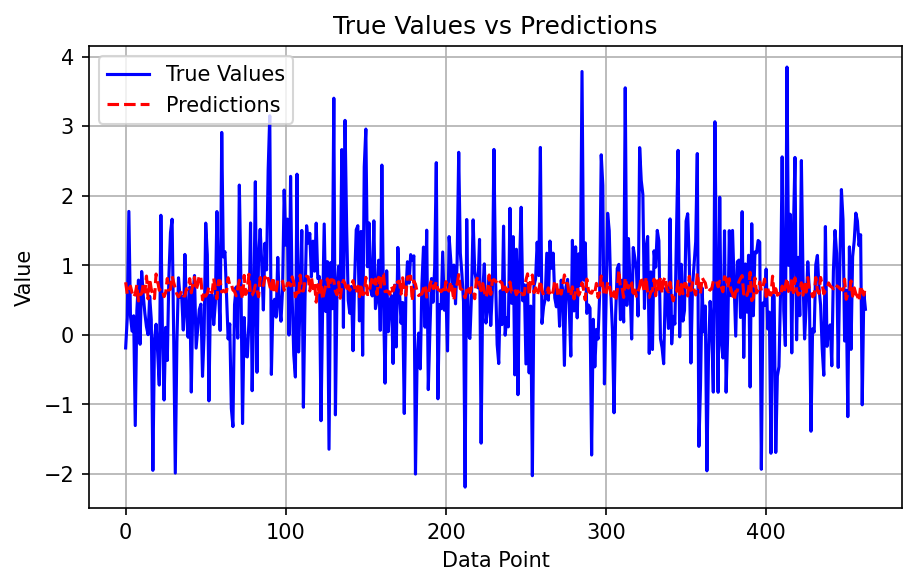

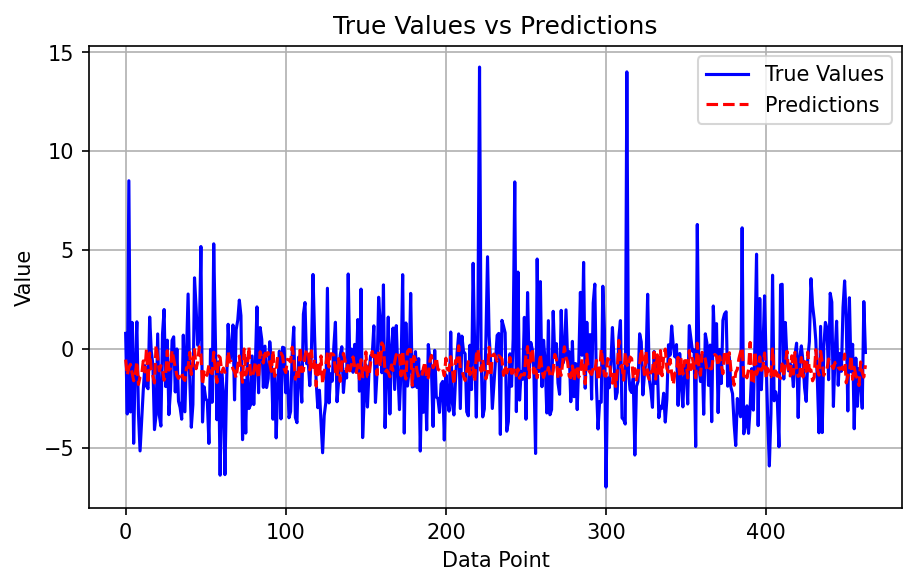

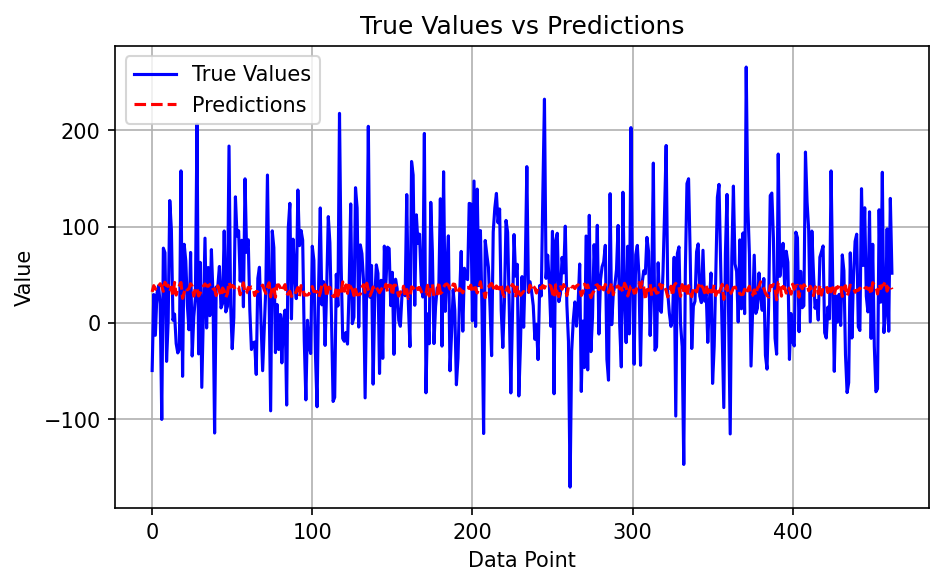

In [ ]:
def load_model(model_path):

    if torch.cuda.is_available():
        model = torch.load(model_path)
    else:
        model = torch.load(model_path, map_location=torch.device('cpu'))

    model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
    return model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_model('model_cnn_pig_data.pth')
pre = []
for i in X_test:
    i = i.unsqueeze(0)
    pre.append(model(i.to(device)).cpu().detach().numpy())
pre = np.array(pre)
pre = np.squeeze(pre)
Y_test1 = Y_test.cpu().detach().numpy().copy()
for i in range(pre.shape[1]):
    pre[:,i] = pre[:,i]*Std[i] +Mean[i]
    Y_test1[:,i] = Y_test1[:,i]*Std[i] +Mean[i]
    plt.figure(dpi=150,figsize=(7,4))
    plt.plot(Y_test1[:,i], label='True Values', color='blue')
    plt.plot(pre[:,i], label='Predictions', linestyle='--', color='red')
    plt.title('True Values vs Predictions')
    plt.xlabel('Data Point')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.savefig('cnn_对比图_{}.jpg'.format(i),dpi=150)
    plt.show()

In [ ]:
def Evaluation_index(Y_test1,pre):
    from sklearn.metrics import r2_score, mean_squared_error,explained_variance_score,mean_absolute_error
    r2 = r2_score(Y_test1,pre)
    ev = explained_variance_score(Y_test1,pre)
    mse = mean_squared_error(Y_test1,pre)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test1,pre)

    pre = pre.reshape(-1)
    Y_test1 = Y_test1.reshape(-1)
    INDEX = []
    page = 0
    for i in Y_test1:
        if i ==0:
            INDEX.append(page)
        page +=1
    if INDEX !=[]:
        Y_test1 = np.delete(Y_test1,INDEX,0)
        pre     = np.delete(pre,INDEX,0)
    mape = (sum(abs((pre - Y_test1)/(Y_test1)))/len(Y_test1))
    evaluation_index = pd.DataFrame()
    evaluation_index['评估指标名称'] = ['r2','ev','mse','rmse','mae','mape']
    evaluation_index['评估指标值'] = [r2,ev,mse,rmse,mae,mape]
    print('r2:',r2)
    print('ev:',ev)
    print('mse:',mse)
    print('rmse:',rmse)
    print('mae:',mae)
    print('mape:',mape)
    return evaluation_index
for i in range(pre.shape[1]):
    evaluation_index = Evaluation_index(Y_test1[:,i],pre[:,i])
    evaluation_index.to_csv(f'evaluation_index_pig_{i}.csv',index = False)
    print('-----------------')

r2: -0.012262684817019087
ev: -0.004080295562744141
mse: 1.4387103
rmse: 1.1994625
mae: 0.7916134
mape: 2.2976206305595697
-----------------
r2: 0.07030334847534858
ev: 0.07922911643981934
mse: 1.0814171
rmse: 1.0399121
mae: 0.814476
mape: 8.48630561162245
-----------------
r2: 0.02084527756349308
ev: 0.026892244815826416
mse: 0.92190176
rmse: 0.96015716
mae: 0.73122543
mape: 4.74723766735412
-----------------
r2: 0.05662786859568569
ev: 0.05679357051849365
mse: 6.0090423
rmse: 2.4513347
mae: 1.8335656
mape: 2.000055614465618
-----------------
r2: 0.016982117166904342
ev: 0.017969846725463867
mse: 4053.128
rmse: 63.66418
mae: 50.162315
mape: 2.247002183296265
-----------------


In [ ]:
evaluation_index = Evaluation_index(Y_test1,pre)

r2: 0.030499192073836646
ev: 0.035360729694366454
mse: 812.5157
rmse: 28.504662
mae: 10.866637
mape: 3.9556443414596045
